## wish_history
Takes your wish history (obtained from the Wish menu in-game) and parses it into a readable format. Because Genshin doesn't have "Export as CSV" as an option.

In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt

## Define the functions

In [2]:
def read_history(fname='./example_data/character_wish.txt',year=2020,save_csv=None):
    '''
    Reads a single-column text file that is info copy-pasted from the Wish history.
    This will break if you have blank lines in the file so make sure you don't.
    * fname: path to your text file you're reading from. Default fname is a sample text file.
    * year: the current year. I'll have to change this notebook in 2021 lol.
    * save_csv: default is None. If a file path, will save the wish history as a .csv to that file path.
    '''
    year = str(year)
    wish_history = []
    txt = []
    with open(fname) as f:
        csvReader = csv.reader(f)
        for i,row in enumerate(csvReader):
            txt.append(row[0])
            if year in row[0]:
                date = txt[i]
                item = txt[i-1]
                item_type = txt[i-2]
                wish_history.append(np.array((date,item,item_type)))
    wish_history = np.vstack(wish_history)
    n_wishes = wish_history.shape[0]
    print("Found %d wishes." % n_wishes)
    if save_csv != None:
        try:
            with open(save_csv, 'w+', newline='') as f:
                csvWriter = csv.writer(f)
                csvWriter.writerows(wish_history)
        except:
            raise Exception("Incorrect filepath %s" % save_csv)
    return np.flip(wish_history)

In [3]:
def wish_interval(wish_history, stars=5):
    '''
    Prints out how many wishes between your 4 or 5 star pulls, as well as some stats. Defaults to 5 stars
    '''
    star_str = "%d-Star" % stars
    star = [x for x in wish_history[:,1] if star_str in x]
    star_idxs,wishesbetween = [],[]
    for i,wish in enumerate(wish_history):
        if wish[1] in star:
            star_idxs.append(i)
    for i,idx in enumerate(star_idxs):
        char = wish_history[idx][1][:-9]
        if i > 0:
            prevchar = wish_history[star_idxs[i-1]][1][:-9]
            wishbetween = idx - (star_idxs[i-1])
            print("It took %d wishes after you rolled %s to get %s." % (wishbetween,prevchar,char))
        else:
            wishbetween = idx
            print("It took %d wishes to get your first %s star (%s)." % (wishbetween,stars,char))
        wishesbetween.append(wishbetween)
    print(" ")
    mean = np.array(wishesbetween).mean()
    print("Mean number of wishes between %d star rolls: %d" % (stars, mean))
    print("Range: %d to %d" % (np.array(wishesbetween).min(), np.array(wishesbetween).max()))
    print(" ")
    laststar = wish_history.shape[0]-idx
    print("Wishes between last %d star and now: %d" % (stars, laststar))
    nextstar = int(mean-laststar)
    print("Using your mean distribution of %d star wishes, your next %d star wish will be in %d wishes."%(stars,stars,nextstar))
    if stars == 5:
        pityroll = 90
    elif stars == 4:
        pityroll = 10
    print("Worst case scenario: you will get a pity %d star in %d wishes." % (stars,pityroll-laststar))

In [4]:
def plot_interval(wish_history, stars=5):
    '''
    Makes a bar plot showing the intervals between 4/5 star wishes.
    '''
    fig = plt.figure(figsize=(10,6))
    star_str = "%d-Star" % stars
    star = [x for x in wish_history[:,1] if star_str in x]
    x = star # names of starred drops
    star_idxs,wishesbetween = [],[]
    for i,wish in enumerate(wish_history):
        if wish[1] in star:
            star_idxs.append(i)
    for i,idx in enumerate(star_idxs):
        char = wish_history[idx][1][:-9]
        if i > 0:
            prevchar = wish_history[star_idxs[i-1]][1][:-9]
            wishbetween = idx - (star_idxs[i-1])
        else:
            wishbetween = idx
        wishesbetween.append(wishbetween)
    y = wishesbetween
    if stars == 5:
        color = 'orange'
    elif stars == 4:
        color = 'purple'
    plt.bar(x,y,color=color)
    mean = np.array(wishesbetween).mean()
    plt.axhline(mean,color='k',label='average number of wishes to get %d star'%stars)
    plt.xticks(rotation='vertical')
    plt.ylabel("Wishes to Unlock")
    plt.xlabel("Item")
    plt.legend(loc = 'lower right');
    plt.tight_layout()

In [5]:
def plot_history(wish_history):
    '''
    Displays a timeline of your wish history, separated by 4 star and 5 star wishes.
    * wish_history: an n x 3 NumPy array where n is the number of wishes in a given banner. The output of read_history().
    '''
    fig = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=True,figsize=(15,4))
    x = np.arange(0,wish_history.shape[0])
    y = np.zeros((wish_history.shape[0]))
    # 4 stars
    plt.subplot(2,1,1)
    plt.plot(x,y,alpha=0);
    plt.gca().set_xlim(0,wish_history.shape[0]);
    plt.gca().set_yticks([]);
    plt.gca().set_xticks([]);
    plt.title('4 star wishes')
    for i,wish in enumerate(wish_history):
        if '4-Star' in wish[1]:
            plt.axvline(i,color='purple',alpha=0.5)
            plt.text(i,-0.05,wish[1][:-9],rotation='vertical',ma='center')
    # 5 stars
    plt.subplot(2,1,2)
    plt.plot(x,y,alpha=0);
    plt.gca().set_xlim(0,wish_history.shape[0]);
    plt.gca().set_yticks([]);
    plt.xlabel('Wish');
    plt.title('5 star wishes')
    for i,wish in enumerate(wish_history):
        if '5-Star' in wish[1]:
            plt.axvline(i,color='orange',alpha=0.5)
            plt.text(i,-0.009,wish[1][:-9],rotation='vertical',ma='center')

## Example usage
Just load your own text file if you would like to use your own wish history instead. You can do this with `read_history()`.

#### Character banner history

In [6]:
wish_history = read_history(save_csv = './example_data/character_wish.csv')

Found 203 wishes.


In [7]:
wish_interval(wish_history,stars=5)

It took 76 wishes to get your first 5 star (Mona).
It took 78 wishes after you rolled Mona to get Klee.
 
Mean number of wishes between 5 star rolls: 77
Range: 76 to 78
 
Wishes between last 5 star and now: 49
Using your mean distribution of 5 star wishes, your next 5 star wish will be in 28 wishes.
Worst case scenario: you will get a pity 5 star in 41 wishes.


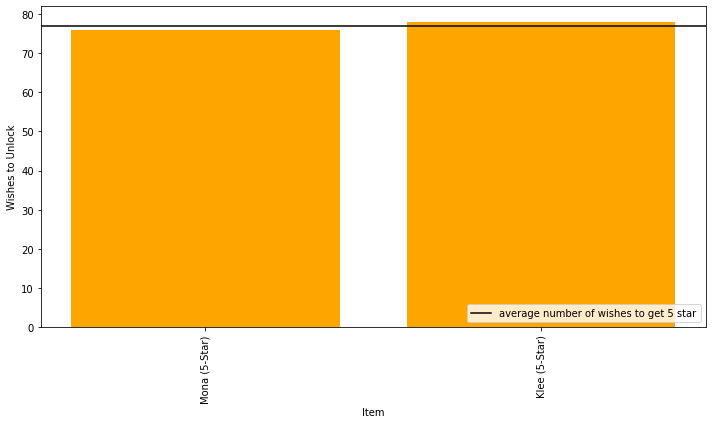

In [8]:
plot_interval(wish_history,stars=5)

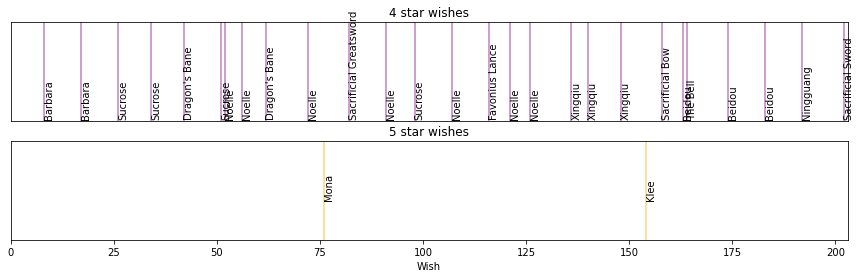

In [9]:
plot_history(wish_history)

In [10]:
wish_interval(wish_history,stars=4)

It took 8 wishes to get your first 4 star (Barbara).
It took 9 wishes after you rolled Barbara to get Barbara.
It took 9 wishes after you rolled Barbara to get Sucrose.
It took 8 wishes after you rolled Sucrose to get Sucrose.
It took 8 wishes after you rolled Sucrose to get Dragon's Bane.
It took 9 wishes after you rolled Dragon's Bane to get Sucrose.
It took 1 wishes after you rolled Sucrose to get Noelle.
It took 4 wishes after you rolled Noelle to get Noelle.
It took 6 wishes after you rolled Noelle to get Dragon's Bane.
It took 10 wishes after you rolled Dragon's Bane to get Noelle.
It took 10 wishes after you rolled Noelle to get Sacrificial Greatsword.
It took 9 wishes after you rolled Sacrificial Greatsword to get Noelle.
It took 7 wishes after you rolled Noelle to get Sucrose.
It took 9 wishes after you rolled Sucrose to get Noelle.
It took 9 wishes after you rolled Noelle to get Favonius Lance.
It took 5 wishes after you rolled Favonius Lance to get Noelle.
It took 5 wishes a

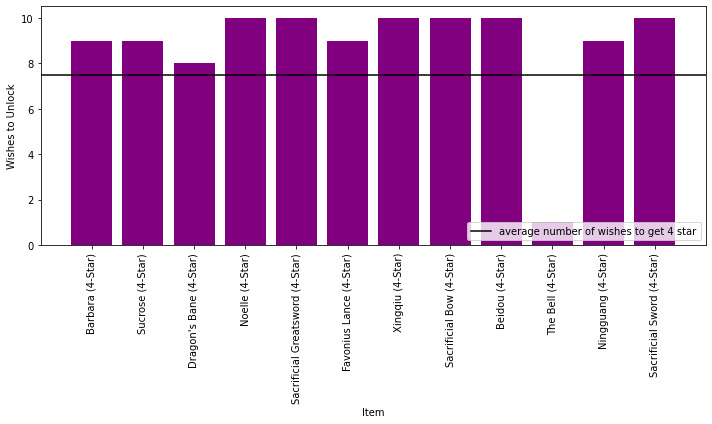

In [11]:
plot_interval(wish_history,stars=4)

#### Permanent banner history

In [12]:
wish_history = read_history(fname='./example_data/permanent_wish.txt',save_csv = './example_data/permanent_wish.csv')

Found 143 wishes.


In [13]:
wish_interval(wish_history,stars=5)

It took 77 wishes to get your first 5 star (Diluc).
 
Mean number of wishes between 5 star rolls: 77
Range: 77 to 77
 
Wishes between last 5 star and now: 66
Using your mean distribution of 5 star wishes, your next 5 star wish will be in 11 wishes.
Worst case scenario: you will get a pity 5 star in 24 wishes.


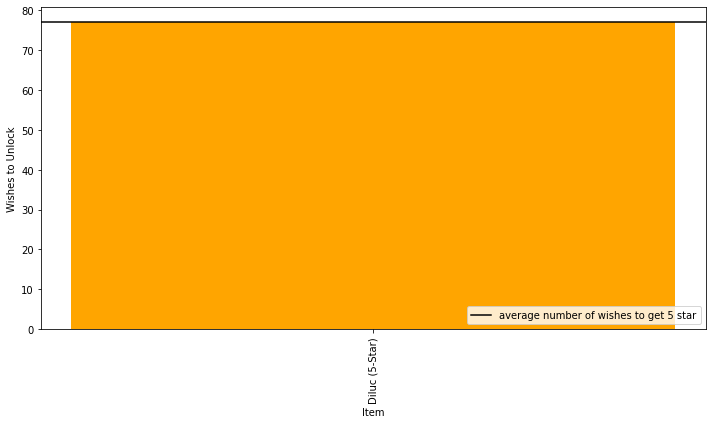

In [14]:
plot_interval(wish_history,stars=5)

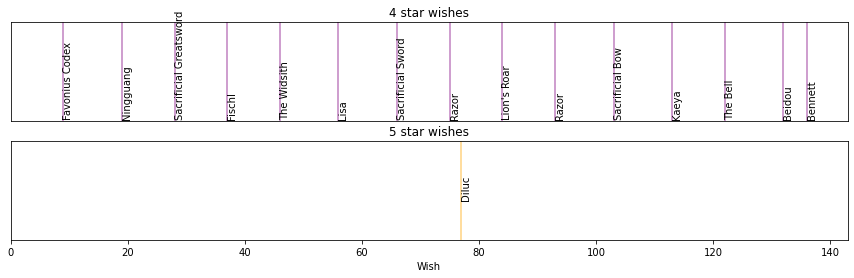

In [15]:
plot_history(wish_history)

In [16]:
wish_interval(wish_history,stars=4)

It took 9 wishes to get your first 4 star (Favonius Codex).
It took 10 wishes after you rolled Favonius Codex to get Ningguang.
It took 9 wishes after you rolled Ningguang to get Sacrificial Greatsword.
It took 9 wishes after you rolled Sacrificial Greatsword to get Fischl.
It took 9 wishes after you rolled Fischl to get The Widsith.
It took 10 wishes after you rolled The Widsith to get Lisa.
It took 10 wishes after you rolled Lisa to get Sacrificial Sword.
It took 9 wishes after you rolled Sacrificial Sword to get Razor.
It took 9 wishes after you rolled Razor to get Lion's Roar.
It took 9 wishes after you rolled Lion's Roar to get Razor.
It took 10 wishes after you rolled Razor to get Sacrificial Bow.
It took 10 wishes after you rolled Sacrificial Bow to get Kaeya.
It took 9 wishes after you rolled Kaeya to get The Bell.
It took 10 wishes after you rolled The Bell to get Beidou.
It took 4 wishes after you rolled Beidou to get Bennett.
 
Mean number of wishes between 4 star rolls: 9
R

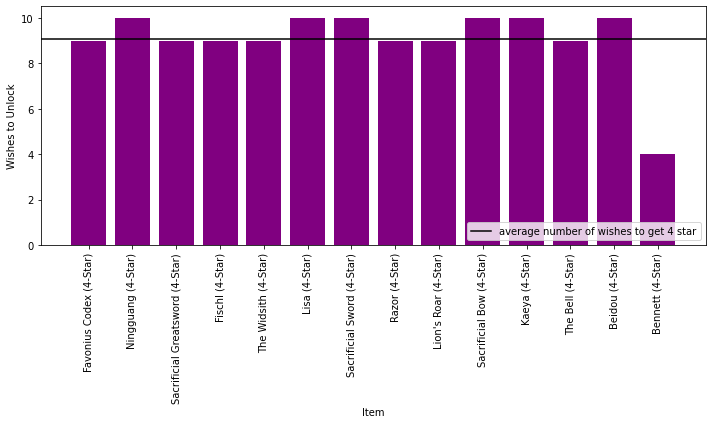

In [17]:
plot_interval(wish_history,stars=4)